In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses.
For your convenience, you can review the descriptions of the data columns from [here](data-description.txt)

"Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. 
You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.
#### First, import the basic libraries and the dataset.

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt


house_pr = pd.read_csv('housing_prices.csv') #import file as dataframe
house_pr2 = house_pr.copy()

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [11]:
house_pr.head() #understand info displaying the first occurrencces

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

You find the dataset has 81 columns which are a lot.
Since the column `Id` is meaningless in our data visualization work, let's drop it

In [12]:
house_pr = house_pr.drop(columns='Id') #droping columns
house_pr.head() # verify the drop

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.
#### In the cell below, calculate the percentage of missing values for each column.
Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:
![Missing Values](missing-values.png)
[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [16]:
nan_values_lst = house_pr.columns[house_pr.isnull().any()] #check the columns with missing values
nan_values_lst

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [51]:
mis_val_percent = 100 * house_pr.isnull().sum() / len(house_pr) #search for the % of missing values in the DataFrame
print(mis_val_percent)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64


In [77]:
mis_val_percent_df = pd.DataFrame(mis_val_percent) #create a dataframe out of the series
mis_val_percent_df = mis_val_percent_df.reset_index() #create index for the dataframe
mis_val_percent_df = mis_val_percent_df.rename(columns = {'index': 'column_name', 0: 'percent_missing'}) #rename columns
mis_val_percent_df

,column_name,percent_missing
0,MSSubClass,0.000000
1,MSZoning,0.000000
2,LotFrontage,17.739726
3,LotArea,0.000000
4,Street,0.000000
...,...,...
75,MoSold,0.000000
76,YrSold,0.000000
77,SaleType,0.000000
78,SaleCondition,0.000000


In [90]:
twenty_plus_df = mis_val_percent_df.loc[mis_val_percent_df['percent_missing'] >= 20] #select only values of 20% or more
twenty_plus_df = twenty_plus_df.sort_values(by='percent_missing', ascending=False) #sort the result descending
twenty_plus_df

,column_name,percent_missing
71,PoolQC,99.520548
73,MiscFeature,96.301370
5,Alley,93.767123
72,Fence,80.753425
56,FireplaceQu,47.260274


#### Drop the columns you find that have more than 20% missing values.
After dropping, check the shape of your dataframes. You should have 75 columns now.

In [93]:
lst_twenty_plus = twenty_plus_df['column_name'] #select columns with values 20% or higher
house_pr_cl = house_pr.drop(columns=lst_twenty_plus) #droping columns
house_pr_cl.head() # verify the drop

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. 
This is important because normally distributed data can be better represented with mathematical models.
In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

[(20000.0, 800000.0)]

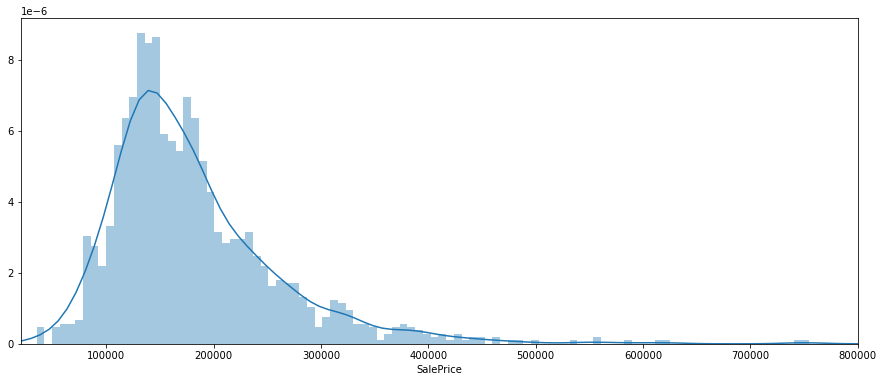

In [116]:
fig, ax = pyplot.subplots(figsize=(15,6))
sns.distplot(house_pr_cl['SalePrice'], bins=100)#create a distribution plot with column SalePrice
ax.set(xlim=(20000, 800000))

We can see that most of the sale prices are between 100.000 and 200.000$

## Challenge 2 - Exploring Data with Common Sense
Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.
This dataset is about housing sales. According to common sense, housing prices depend on the following factors:
* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).
* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).
* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).
* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above.
Note that:
* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [132]:
price_size_df = house_pr[['SalePrice', 'GrLivArea', 'LotArea', 'GarageArea']] #create DataFrame with specific columns
price_size_df.corr() #verify the correlation between them

,SalePrice,GrLivArea,LotArea,GarageArea
SalePrice,1.000000,0.708624,0.263843,0.623431
GrLivArea,0.708624,1.000000,0.263116,0.468997
LotArea,0.263843,0.263116,1.000000,0.180403
GarageArea,0.623431,0.468997,0.180403,1.000000


In [142]:
#create DataFrame with specific columns
price_rooms_df = house_pr[['SalePrice', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]
#create a new column out of others
price_rooms_df['Total_rooms'] = price_rooms_df['BedroomAbvGr'] + price_rooms_df['KitchenAbvGr'] + price_rooms_df['FullBath'] 
+ price_rooms_df['HalfBath'] + price_rooms_df['BsmtFullBath'] + price_rooms_df['BsmtHalfBath']
#verify the correlation between them
price_rooms_df.corr()

<ipython-input-142-09fc5fa68266>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_rooms_df['Total_rooms'] = price_rooms_df['BedroomAbvGr'] + price_rooms_df['KitchenAbvGr'] + price_rooms_df['FullBath']


,SalePrice,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,Total_rooms
SalePrice,1.000000,0.168213,-0.135907,0.560664,0.284108,0.227122,-0.016844,0.345866
BedroomAbvGr,0.168213,1.000000,0.198597,0.363252,0.226651,-0.150673,0.046519,0.880675
KitchenAbvGr,-0.135907,0.198597,1.000000,0.133115,-0.068263,-0.041503,-0.037944,0.378716
FullBath,0.560664,0.363252,0.133115,1.000000,0.136381,-0.064512,-0.054536,0.728519
HalfBath,0.284108,0.226651,-0.068263,0.136381,1.000000,-0.030905,-0.012340,0.203610
BsmtFullBath,0.227122,-0.150673,-0.041503,-0.064512,-0.030905,1.000000,-0.147871,-0.139292
BsmtHalfBath,-0.016844,0.046519,-0.037944,-0.054536,-0.012340,-0.147871,1.000000,-0.000379
Total_rooms,0.345866,0.880675,0.378716,0.728519,0.203610,-0.139292,-0.000379,1.000000


In [147]:
#create DataFrame with specific columns
price_yr_df = house_pr[['SalePrice', 'YearBuilt', 'YearRemodAdd']]
price_yr_df['House_age'] = 2020 - price_yr_df['YearBuilt']
price_yr_df['House_last_Remod'] = 2020 - price_yr_df['YearRemodAdd']
price_yr_df.corr()

<ipython-input-147-a44b60e0cf46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_yr_df['House_age'] = 2020 - price_yr_df['YearBuilt']
<ipython-input-147-a44b60e0cf46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_yr_df['House_last_Remod'] = 2020 - price_yr_df['YearRemodAdd']


,SalePrice,YearBuilt,YearRemodAdd,House_age,House_last_Remod
SalePrice,1.000000,0.522897,0.507101,-0.522897,-0.507101
YearBuilt,0.522897,1.000000,0.592855,-1.000000,-0.592855
YearRemodAdd,0.507101,0.592855,1.000000,-0.592855,-1.000000
House_age,-0.522897,-1.000000,-0.592855,1.000000,0.592855
House_last_Remod,-0.507101,-0.592855,-1.000000,0.592855,1.000000


In [163]:
corr_df = pd.concat([house_pr[['SalePrice', 'GrLivArea', 'LotArea', 'GarageArea']], price_rooms_df['Total_rooms'], price_yr_df[['House_age', 'House_last_Remod']]], axis=1)
print(corr_df)
corr_df.corr()

      SalePrice  GrLivArea  LotArea  GarageArea  Total_rooms  House_age  \
0        208500       1710     8450         548            6         17   
1        181500       1262     9600         460            6         44   
2        223500       1786    11250         608            6         19   
3        140000       1717     9550         642            5        105   
4        250000       2198    14260         836            7         20   
...         ...        ...      ...         ...          ...        ...   
1455     175000       1647     7917         460            6         21   
1456     210000       2073    13175         500            6         42   
1457     266500       2340     9042         252            7         79   
1458     142125       1078     9717         240            4         70   
1459     147500       1256     9937         276            5         55   

      House_last_Remod  
0                   17  
1                   44  
2                   18  

,SalePrice,GrLivArea,LotArea,GarageArea,Total_rooms,House_age,House_last_Remod
SalePrice,1.000000,0.708624,0.263843,0.623431,0.345866,-0.522897,-0.507101
GrLivArea,0.708624,1.000000,0.263116,0.468997,0.660197,-0.199010,-0.287389
LotArea,0.263843,0.263116,1.000000,0.180403,0.135596,-0.014228,-0.013788
GarageArea,0.623431,0.468997,0.180403,1.000000,0.218176,-0.478954,-0.371600
Total_rooms,0.345866,0.660197,0.135596,0.218176,1.000000,-0.134493,-0.146115
House_age,-0.522897,-0.199010,-0.014228,-0.478954,-0.134493,1.000000,0.592855
House_last_Remod,-0.507101,-0.287389,-0.013788,-0.371600,-0.146115,0.592855,1.000000


## Challenge 3 - Present Your Stories
Now based on your findings from the explorations, summarize and present your stories.
#### Present the top 5 factors that affect the sale price.
Use the following format to present each factor:
1. A title line about the factor.
2. No more than 3 sentences to describe the relationship between the factor and the sale price.
3. Support your point with the appropriate graph.

In [198]:
l = house_pr.corr().unstack().sort_values().drop_duplicates() #get the correlations in the whole table
l = l.sort_values(ascending=False) #sort them ascending
l.head(50) # display top20 correlations

Id            Id              1.000000
GarageArea    GarageCars      0.882475
YearBuilt     GarageYrBlt     0.825667
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
SalePrice     GrLivArea       0.708624
2ndFlrSF      GrLivArea       0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
GrLivArea     FullBath        0.630012
SalePrice     GarageArea      0.623431
2ndFlrSF      TotRmsAbvGrd    0.616423
SalePrice     TotalBsmtSF     0.613581
HalfBath      2ndFlrSF        0.609707
SalePrice     1stFlrSF        0.605852
OverallQual   GarageCars      0.600671
              GrLivArea       0.593007
YearBuilt     YearRemodAdd    0.592855
GarageYrBlt   GarageCars      0.588920
OverallQual   YearBuilt       0.572323
1stFlrSF      GrLivArea       0.566024
GarageYrBlt   GarageArea      0.564567
GarageArea    OverallQual

### TOP1 Factor for pricing houses: living area square feet (GrLivArea)
- The size of the Lot is the most relevant value to set a price
- The correlation between price and size of the set is above 0.7, the highest of all variables
- This correlation can be observed also in related variables such as Size Above Ground (TotRmsAbvGrd) or the size of the first floor (1stFlrSF)


### TOP2 Factor for pricing houses: having a garage (GarageArea)
- Having a garage increases the value of the house. Its size is the second most important fact with a correlation above 0.62
- But this becomes irrelevant above 1200 square metres of garage. 
- The top of this relation is set in the range 800-1000 square metres


### TOP3 Factor for pricing houses: having a full bath (FullBath)
- Having fullbaths in the house rises the price a great deal with a correlation of 0.56
- 1 or 2 fullbaths is the higher expression of this correlation. The third or more baths vary the price just slightly for each extra bath

### TOP4 Factor for pricing houses: house age (House_age)
- As older is the house, as lower the price with a correlation of -0.52
- At certain points we can see there is top values fleeing from the correlation (range 120-130 years). This could be due to the value of ancient objects in human society


### TOP5 Factor for pricing houses: years from last remodelation (House_last_Remod)
- As less years since the last remodelation, the higher the price.
- With a correlation of - 0.51

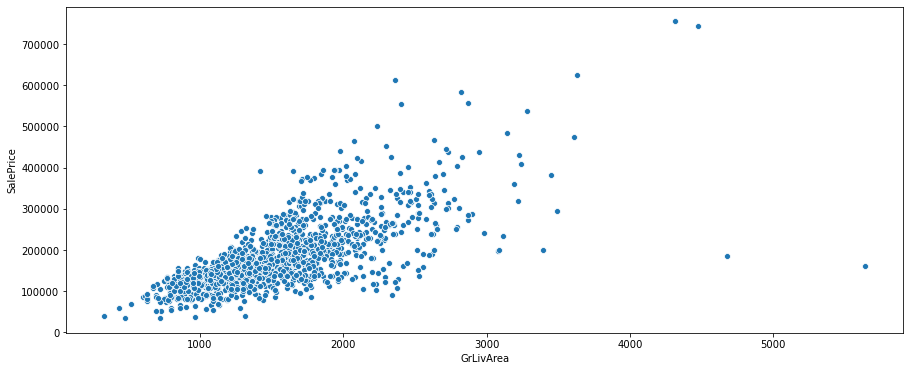

In [212]:
#top1 plot
fig, ax = pyplot.subplots(figsize=(15,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=house_pr)

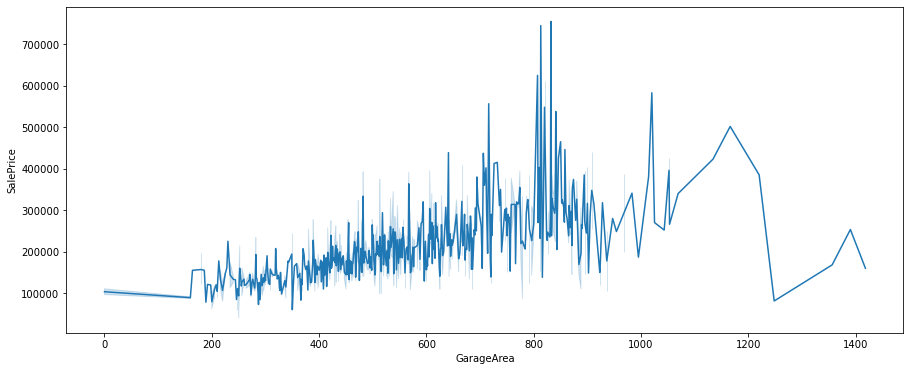

In [214]:
#top2 plot
fig, ax = pyplot.subplots(figsize=(15,6))
sns.lineplot(x="GarageArea", y="SalePrice", data=house_pr)

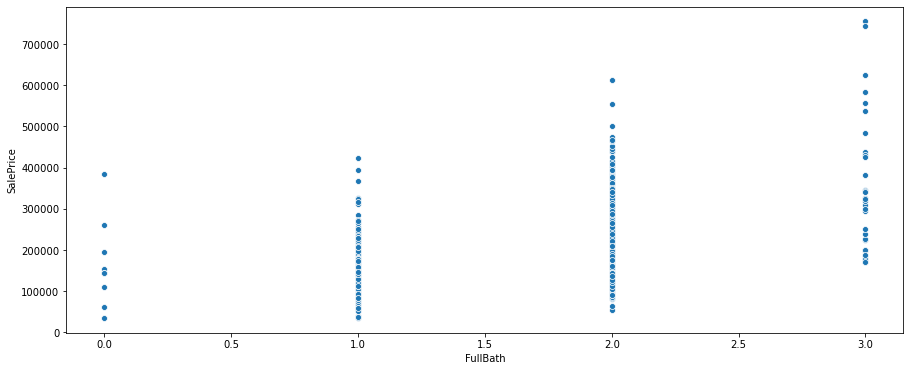

In [215]:
#top3 plot
fig, ax = pyplot.subplots(figsize=(15,6))
sns.scatterplot(x="FullBath", y="SalePrice", data=house_pr)

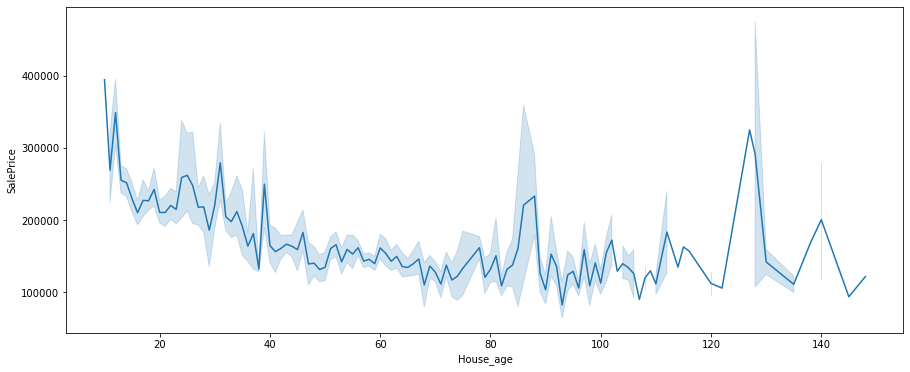

In [217]:
#top4 plot
fig, ax = pyplot.subplots(figsize=(15,6))
sns.lineplot(x="House_age", y="SalePrice", data=price_yr_df)

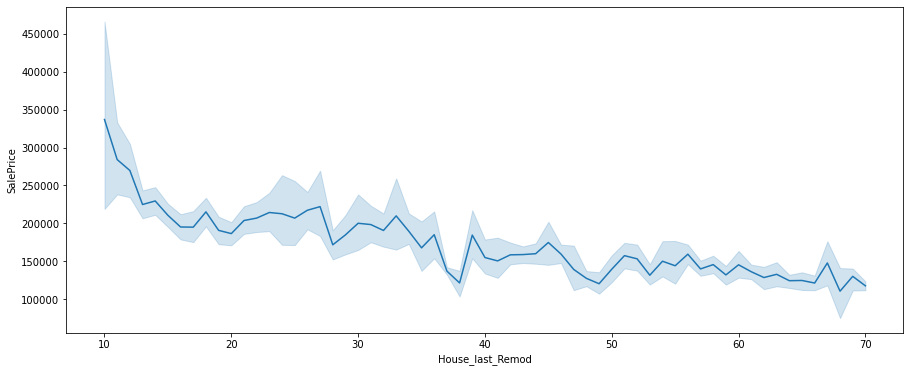

In [218]:
#top5 plot
fig, ax = pyplot.subplots(figsize=(15,6))
sns.lineplot(x="House_last_Remod", y="SalePrice", data=price_yr_df)